In [1]:
# do the imports
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn import preprocessing

# from preprocessing import *
# from math_utils import *
# from plotting import *

%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 6, 5
RANDOM_SEED = 7
np.random.seed(RANDOM_SEED)

from Sequential import Sequential
from Layer import Layer
from metrics import accuracy


In [2]:
# load the data
# X_train, Y_train, X_test, Y_test
with open('data/X_train.pkl', 'rb') as f:
   X_train = pickle.load(f)
with open('data/X_test.pkl', 'rb') as f:
   X_test = pickle.load(f)
with open('data/Y_train.pkl', 'rb') as f:
   Y_train = pickle.load(f)
with open('data/Y_test.pkl', 'rb') as f:
   Y_test = pickle.load(f)
# convert to floating values and normalize
X_train = np.asfarray(X_train)
X_test = np.asfarray(X_test)

X_train /= 127.5
X_train -= 1
X_test /= 127.5
X_test -= 1

In [3]:
# one hot encode the class labels for classification
lb = preprocessing.LabelBinarizer()
lb.fit(Y_train)
Y_train_encoded = lb.transform(Y_train)
Y_test_encoded = lb.transform(Y_test)

In [4]:
# define the model architecture for the shallow network
input_size = len(X_train[0])
hidden_layer_size = 200
output_size = len(Y_train_encoded[0])


In [41]:
# overfitting very small dataset
x = X_train[0:100]
y = Y_train_encoded[0:100]
model = Sequential();
model.add(Layer(size=input_size))
model.add(Layer(size=hidden_layer_size, activation = 'sigmoid'))
model.add(Layer(size=hidden_layer_size, activation = 'sigmoid'))
model.add(Layer(size= output_size, activation='softmax'))
model.compile(learning_rate=0.001)
train_error = []
for i in range(1200):
    model.fit(x= x, targets=y,iterations= 1)
#     if i%20 == 0:
    train_error.append(model.score(x,y,'loss'))
#     print(model.score(x,y))

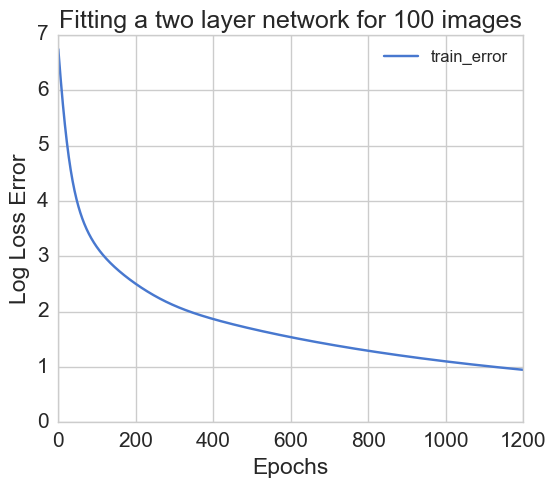

In [42]:
plt.plot(train_error, label="train_error")
# plt.plot(x, sig_prime, label="sigmoid prime")
plt.xlabel("Epochs")
plt.ylabel("Log Loss Error")
plt.legend(prop={'size' : 12})
plt.title('Fitting a two layer network for 100 images')
# plt.show()
plt.savefig('Images/sanity_check_sigmoid.jpg')

In [22]:
hidden_layer_size = 1200
activation = 'relu'
weight_penalty = 0.00
# define the model
# model = Sequential();
# model.add(Layer(size=input_size))
# model.add(Layer(size=hidden_layer_size, activation = activation))
# model.add(Layer(size= output_size, activation='softmax'))
#####################################
model = Sequential()
model.add(Layer(size=input_size))
model.add(Layer(size=hidden_layer_size, activation = activation, type = 'dropout', dropout_keep_prob=1))
model.add(Layer(size=hidden_layer_size, activation = activation, type = 'dropout', dropout_keep_prob=1))
model.add(Layer(size=hidden_layer_size, activation = activation, type = 'dropout', dropout_keep_prob=1))
model.add(Layer(size=hidden_layer_size, activation = activation, type = 'dropout', dropout_keep_prob=1))
model.add(Layer(size=hidden_layer_size, activation = activation, type = 'dropout', dropout_keep_prob=1))
model.add(Layer(size= output_size, activation='softmax'))
#####################################

# model.summary()

model.compile(learning_rate=0.001, regularization= 'ridge', weight_penalty= weight_penalty)
# using mini batch SGD for training
epochs = 51
batch_size = 50
train_error = []
test_error = []
test_accuracy = []
# train the model
for i in range(epochs):
    for iteration in range(int(len(Y_test_encoded)/batch_size)):    
        begin_index = iteration*batch_size
        end_index = iteration*batch_size + batch_size
        X_train_batch = X_train[begin_index: end_index] 
        noise = np.random.normal(0, 0.01, X_train_batch.shape)
        X_train_batch = X_train_batch + noise 
        Y_train_batch = Y_train_encoded[begin_index: end_index]
        model.fit(x = X_train_batch, targets=Y_train_batch,iterations= 1)
    if i%5==0:
        train_error.append(model.score(X_train,Y_train_encoded,'loss'))
        test_error.append(model.score(X_test,Y_test_encoded,'loss'))
#         test_accuracy.append(model.score(X_test,Y_test_encoded))
    print(model.score(X_test,Y_test_encoded))

0.7445833333333334
0.7970833333333334
0.8208333333333333
0.8333333333333334
0.8454166666666667
0.8541666666666666
0.860625
0.8635416666666667
0.869375
0.8741666666666666
0.876875
0.8804166666666666
0.8839583333333333
0.885
0.8870833333333333
0.889375
0.8904166666666666
0.891875
0.8925
0.8935416666666667
0.8947916666666667
0.8952083333333334
0.89625
0.898125
0.8989583333333333
0.8995833333333333
0.900625
0.9016666666666666
0.9020833333333333
0.903125
0.9035416666666667
0.9039583333333333
0.9047916666666667
0.9058333333333334
0.9060416666666666
0.9064583333333334
0.906875
0.9070833333333334
0.9075
0.9085416666666667
0.9095833333333333
0.9097916666666667
0.9097916666666667
0.910625
0.9097916666666667
0.9102083333333333
0.9104166666666667
0.9102083333333333
0.9110416666666666
0.9110416666666666
0.91125


model params: total_layers = 7 ,activation = relu ,weight_penalty = 0.0 ,hidden_layer_size = 1200


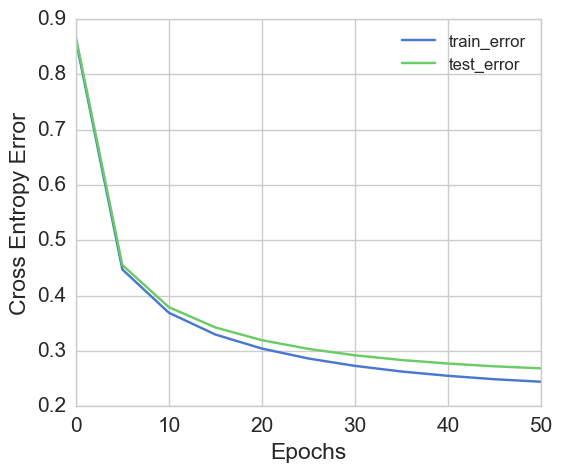

In [25]:
title = "model params: total_layers = {} ,activation = {} ,weight_penalty = {} ,hidden_layer_size = {}".format(len(model.layer_sizes),

                                                                                            activation, weight_penalty, hidden_layer_size)
x = [i*5 for i in range(0,11)]
plt.plot(x,train_error, label="train_error")
plt.plot(x,test_error, label="test_error")
# plt.plot(x, sig_prime, label="sigmoid prime")
# plt.plot(x,sigmoid_model, label="sigmoid_activation")
# plt.plot(x,train_error, label="relu_activation")
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy Error")
plt.legend(prop={'size' : 12})
# plt.text(0,0,title)
# plt.plot(model.norms[-50:])
# plt.show()
plt.savefig('Images/deep_1200.jpg')
print(title)

In [6]:
def show_image(array):
    first_image = array
    pixels = first_image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

In [13]:
print(model.predict(X_train[0]))
print(model.predict(X_train[7]))
# print(model.predict(X_train[2]))
# print(model.predict(X_train[3]))
# print(model.predict(X_train[4]))
# print(model.predict(X_train[5]))
# show_image(X_train[0])
# show_image(X_train[1])
# show_image(X_train[2])

[[3.78049380e-136 1.31839597e-260 4.23905094e-292 1.00000000e+000
  1.82066927e-277 0.00000000e+000]]
[[1.60410687e-300 1.11461210e-319 7.59518275e-276 1.06118906e-289
  1.00000000e+000 0.00000000e+000]]
